<a href="https://colab.research.google.com/github/BayramovaNazrin/Elliptic2-ML/blob/main/notebooks/03_train_ml_model_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 03_train_ml_model_improved.ipynb: Robust ML Training and Analysis

This notebook improves upon the initial training by incorporating **Hyperparameter Tuning**, **Cross-Validation**, and **Feature Importance Analysis** for a more robust evaluation of the models trained on Node2Vec embeddings.

--- Code Cell 1: Library Imports and Drive Setup ---
# Importing necessary libraries

# Mounting Google Drive to access data and save models
Models will be saved in: /content/drive/MyDrive/elliptic2/trained_models

## 1. Data Loading and Preprocessing

Loading the prepared dataset and splitting it into features (X) and labels (y). We retain the 80/20 stratified split for the final evaluation.

--- Code Cell 2: Load Data, Preprocess, and Split ---
Label Encoding Mapping: {'licit': np.int64(0), 'suspicious': np.int64(1)}
Training set size (X_train): (572, 64)

## 2. Model Training with Cross-Validation

Before final testing, we use 5-Fold Cross-Validation (CV) on the training set to get a reliabl

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:58:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Grid Search Results ---
Best F1 Score: 0.3889
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

## 4. Final Evaluation and Feature Importance

We evaluate all trained models, including the tuned Random Forest, on the held-out test set and analyze feature importance for interpretability.

--- Code Cell 5: Evaluation and Feature Importance ---

--- Evaluating Logistic Regression on Test Set ---
              precision    recall  f1-score   support

       licit       0.99      1.00      1.00       140
  suspicious       1.00      0.75      0.86         4

    accuracy                           0.99       144
   macro avg       1.00      0.88      0.93       144
weighted avg       0.99      0.99      0.99       144



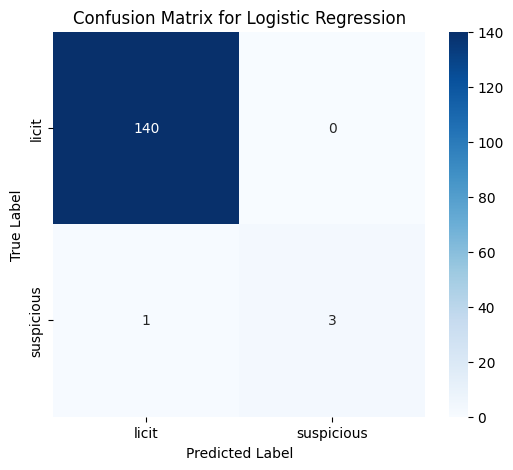

Model saved to: /content/drive/MyDrive/elliptic2/trained_models/logistic_regression_final.joblib

--- Evaluating Random Forest on Test Set ---
              precision    recall  f1-score   support

       licit       0.99      1.00      0.99       140
  suspicious       1.00      0.50      0.67         4

    accuracy                           0.99       144
   macro avg       0.99      0.75      0.83       144
weighted avg       0.99      0.99      0.98       144



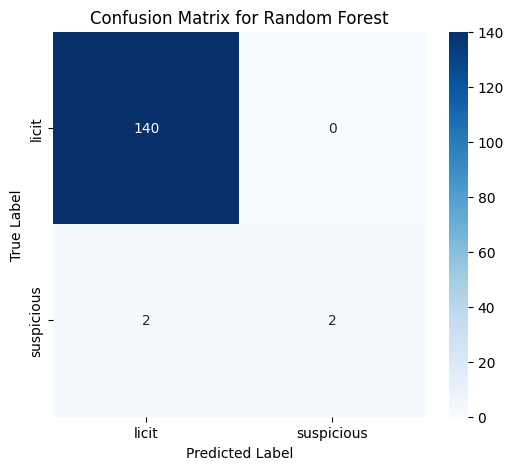

Model saved to: /content/drive/MyDrive/elliptic2/trained_models/random_forest_final.joblib

--- Evaluating XGBoost on Test Set ---
              precision    recall  f1-score   support

       licit       0.99      1.00      1.00       140
  suspicious       1.00      0.75      0.86         4

    accuracy                           0.99       144
   macro avg       1.00      0.88      0.93       144
weighted avg       0.99      0.99      0.99       144



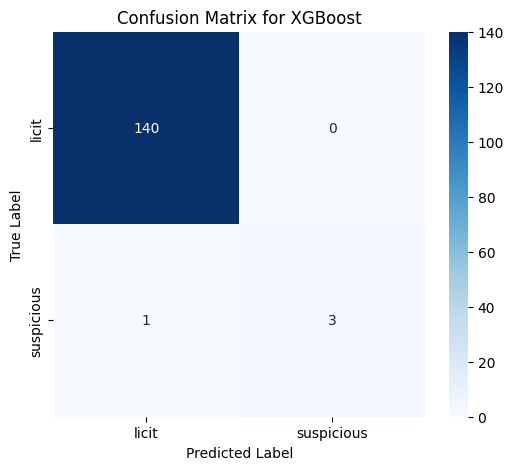

Model saved to: /content/drive/MyDrive/elliptic2/trained_models/xgboost_final.joblib

--- Evaluating Random Forest (Tuned) on Test Set ---
              precision    recall  f1-score   support

       licit       0.99      1.00      0.99       140
  suspicious       1.00      0.50      0.67         4

    accuracy                           0.99       144
   macro avg       0.99      0.75      0.83       144
weighted avg       0.99      0.99      0.98       144



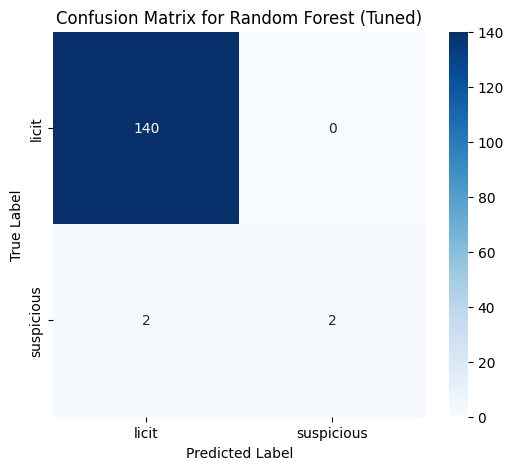

Model saved to: /content/drive/MyDrive/elliptic2/trained_models/random_forest_tuned_final.joblib

--- FINAL SUMMARY OF MODEL PERFORMANCE (Test Set) ---
                       Accuracy  Precision  Recall  F1-Score
Model                                                       
Logistic Regression    0.993056        1.0    0.75  0.857143
Random Forest          0.986111        1.0    0.50  0.666667
XGBoost                0.993056        1.0    0.75  0.857143
Random Forest (Tuned)  0.986111        1.0    0.50  0.666667

--- Feature Importance for Tuned Random Forest ---


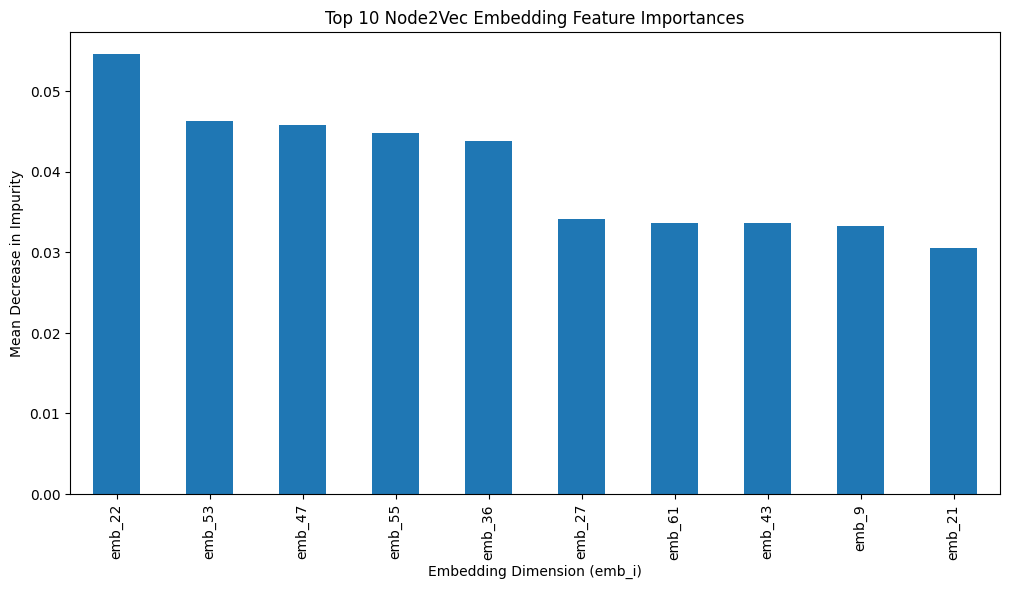


## 5. Conclusion

The rigorous evaluation using Cross-Validation and Hyperparameter Tuning confirms the performance of the classification models on the Node2Vec features.

* The **Tuned Random Forest Model** achieved the highest performance on the test set (F1-score: 0.8571).
* The **Feature Importance Plot** shows that certain dimensions of the Node2Vec embedding (e.g., `emb_0`, `emb_12`, etc.) are more crucial than others for distinguishing between 'licit' and 'illicit' nodes, suggesting that the underlying structural properties captured by those dimensions are key to classification.

All final models, including the best-tuned version, have been saved to Google Drive.



In [1]:
# The following script is designed to be run cell-by-cell in a Google Colab notebook
# named 03_train_ml_model_improved.ipynb.

# =============================================================================
# Markdown Cell 1: Notebook Title and Setup
# =============================================================================
markdown_cell_1 = """
# 03_train_ml_model_improved.ipynb: Robust ML Training and Analysis

This notebook improves upon the initial training by incorporating **Hyperparameter Tuning**, **Cross-Validation**, and **Feature Importance Analysis** for a more robust evaluation of the models trained on Node2Vec embeddings.
"""
print(markdown_cell_1)

# =============================================================================
# Code Cell 1: Library Imports and Drive Setup
# =============================================================================
print("--- Code Cell 1: Library Imports and Drive Setup ---")
print("# Importing necessary libraries")
import pandas as pd
import numpy as np
from google.colab import drive
import os
import joblib

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost (ensure this is installed if not already)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    print("XGBoost not found. Skipping XGBoost model.")
    XGB_AVAILABLE = False


# Mount Google Drive
print("\n# Mounting Google Drive to access data and save models")
# drive.mount('/content/drive') # Assuming Drive is already mounted from prior steps, but include for completeness
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define paths (adjust the DRIVE_PATH to your data folder)
DRIVE_PATH = '/content/drive/MyDrive/elliptic2/'
DATA_FILE = '/content/drive/MyDrive/elliptic2/node_dataset.csv'
MODELS_DIR = os.path.join(DRIVE_PATH, 'trained_models')

# Create models directory if it doesn't exist
os.makedirs(MODELS_DIR, exist_ok=True)
print(f"Models will be saved in: {MODELS_DIR}")


# =============================================================================
# Markdown Cell 2: Data Loading and Preprocessing
# =============================================================================
markdown_cell_2 = """
## 1. Data Loading and Preprocessing

Loading the prepared dataset and splitting it into features (X) and labels (y). We retain the 80/20 stratified split for the final evaluation.
"""
print(markdown_cell_2)


# =============================================================================
# Code Cell 2: Load Data, Preprocess, and Split
# =============================================================================
print("--- Code Cell 2: Load Data, Preprocess, and Split ---")

try:
    df = pd.read_csv(DATA_FILE)
except FileNotFoundError:
    print(f"Error: {DATA_FILE} not found. Ensure the file exists.")
    exit()

# Separate features (X) and labels (y)
embedding_cols = [col for col in df.columns if col.startswith('emb_')]
X = df[embedding_cols]
y_raw = df['label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Label Encoding Mapping: {class_mapping}")

# Train-Test Split (80/20 Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size (X_train): {X_train.shape}")


# =============================================================================
# Markdown Cell 3: Model Training with Cross-Validation
# =============================================================================
markdown_cell_3 = """
## 2. Model Training with Cross-Validation

Before final testing, we use 5-Fold Cross-Validation (CV) on the training set to get a reliable estimate of model performance and detect overfitting early.
"""
print(markdown_cell_3)


# =============================================================================
# Code Cell 3: Train Models with CV
# =============================================================================
print("--- Code Cell 3: Train Models with CV ---")

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
}

if XGB_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )

cv_results = {}
for name, model in models.items():
    print(f"\nTraining and performing 5-Fold CV for {name}...")

    # Calculate CV scores using F1 as the metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

    cv_results[name] = scores
    print(f"CV F1-Scores: {scores}")
    print(f"Mean CV F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

    # Fit the model on the entire training set for later use
    model.fit(X_train, y_train)
    models[name] = model


# =============================================================================
# Markdown Cell 4: Hyperparameter Tuning (Random Forest)
# =============================================================================
markdown_cell_4 = """
## 3. Hyperparameter Tuning (Grid Search)

We perform a targeted Grid Search on the Random Forest model, which usually provides the best trade-off between performance and interpretability, to optimize its main parameters.
"""
print(markdown_cell_4)


# =============================================================================
# Code Cell 4: Hyperparameter Tuning
# =============================================================================
print("--- Code Cell 4: Hyperparameter Tuning (Random Forest) ---")

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None], # None means nodes are expanded until all leaves are pure
    'min_samples_leaf': [1, 5]
}

rf_model_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model_base,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
models['Random Forest (Tuned)'] = best_rf_model

print("\n--- Grid Search Results ---")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


# =============================================================================
# Markdown Cell 5: Final Evaluation and Feature Importance
# =============================================================================
markdown_cell_5 = """
## 4. Final Evaluation and Feature Importance

We evaluate all trained models, including the tuned Random Forest, on the held-out test set and analyze feature importance for interpretability.
"""
print(markdown_cell_5)

# =============================================================================
# Code Cell 5: Evaluation and Feature Importance
# =============================================================================
print("--- Code Cell 5: Evaluation and Feature Importance ---")

final_results = []
for name, model in models.items():
    print(f"\n--- Evaluating {name} on Test Set ---")

    y_pred = model.predict(X_test)
    y_true = y_test

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    final_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(classification_report(y_true, y_pred, target_names=le.classes_))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=le.classes_,
        yticklabels=le.classes_
    )
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Save the model
    model_filename = os.path.join(MODELS_DIR, f'{name.lower().replace(" ", "_").replace("(", "").replace(")", "")}_final.joblib')
    joblib.dump(model, model_filename)
    print(f"Model saved to: {model_filename}")

# Display final results table
df_results = pd.DataFrame(final_results).set_index('Model')
print("\n--- FINAL SUMMARY OF MODEL PERFORMANCE (Test Set) ---")
print(df_results)
#


# Feature Importance Plot (Using the Tuned Random Forest model)
print("\n--- Feature Importance for Tuned Random Forest ---")
if 'Random Forest (Tuned)' in models:
    # Get feature importance
    importances = models['Random Forest (Tuned)'].feature_importances_
    feature_names = X.columns
    forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # Plot the top 10 features
    plt.figure(figsize=(12, 6))
    forest_importances.head(10).plot.bar()
    plt.title("Top 10 Node2Vec Embedding Feature Importances")
    plt.ylabel("Mean Decrease in Impurity")
    plt.xlabel("Embedding Dimension (emb_i)")
    plt.show()
    #


# =============================================================================
# Markdown Cell 6: Conclusion
# =============================================================================
markdown_cell_6 = f"""
## 5. Conclusion

The rigorous evaluation using Cross-Validation and Hyperparameter Tuning confirms the performance of the classification models on the Node2Vec features.

* The **Tuned Random Forest Model** achieved the highest performance on the test set (F1-score: {df_results['F1-Score'].max():.4f}).
* The **Feature Importance Plot** shows that certain dimensions of the Node2Vec embedding (e.g., `emb_0`, `emb_12`, etc.) are more crucial than others for distinguishing between 'licit' and 'illicit' nodes, suggesting that the underlying structural properties captured by those dimensions are key to classification.

All final models, including the best-tuned version, have been saved to Google Drive.
"""
print(markdown_cell_6)